In [1]:
%load_ext autoreload
%autoreload 2

import cortex
import numpy as np
import matplotlib.pyplot as pl
import sys

sys.path.append("..")

from prfpy.stimulus import PRFStimulus2D
from prfpy.grid import Iso2DGaussianGridder, Norm_Iso2DGaussianGridder, DoG_Iso2DGaussianGridder
from utils.utils import create_dm_from_screenshots

Using TensorFlow backend.


In [16]:
#load data

timecourse=np.load("/Users/marcoaqil/PRFMapping/sub-001_timecourse_space-fsaverage.npy")

gauss = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-gauss_space-fsaverage.npy")
norm_grid = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_gridparams-norm_space-fsaverage.npy") 
norm_an = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-norm_space-fsaverage_analytic.npy")
norm_num = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-norm_space-fsaverage_numerical.npy")
dog_res= np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-dog_space-fsaverage.npy")
css_res= np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-css_space-fsaverage.npy")
norm_unbound = np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_iterparams-norm_space-fsaverage_unbounded.npy")
norm_combined=np.load("/Users/marcoaqil/PRFMapping/Cartesius results/sub-001_norm-iterparams-combined_space-fsaverage.npy")

rsq_map = gauss[:,-1]>0.2
nonzerovar_mask = np.load("/Users/marcoaqil/PRFMapping/sub-001_nonzerovar-mask_space-fsaverage.npy")


In [ ]:
#plot rsq on cortex

rsq_models = np.zeros((nonzerovar_mask.shape[0],3))

rsq_models[nonzerovar_mask,0] = css_res[:, -1]
rsq_models[nonzerovar_mask,1] = dog_res[:, -1]
rsq_models[nonzerovar_mask,2] = norm_unbound[:, -1]

models_rsq_diff_normdog = cortex.Vertex(rsq_models[:,2]-rsq_models[:,1], subject='fsaverage')#, alpha=alpha)
models_rsq_diff_normcss = cortex.Vertex(rsq_models[:,2]-rsq_models[:,0], subject='fsaverage')#, alpha=alpha)
models_rsq_diff_cssdog = cortex.Vertex(rsq_models[:,0]-rsq_models[:,1], subject='fsaverage')

ds = cortex.Dataset(rsq_1=models_rsq_diff_cssdog, rsq_2=models_rsq_diff_normcss) 

cortex.webgl.show(models_rsq_diff_normcss,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=False, 
                 with_borders=True, 
                 with_colorbar=True)


In [8]:
#plot ecc on cortex

ecc_models = np.zeros((fsaverage_total_vertices,3))

ecc_models[tc_full_iso_nonzerovar_dict['nonzerovar_mask'],0] = np.sqrt(css_res[:,0]**2+css_res[:,1]**2)
ecc_models[tc_full_iso_nonzerovar_dict['nonzerovar_mask'],1] = np.sqrt(dog_res[:,0]**2+dog_res[:,1]**2)
ecc_models[tc_full_iso_nonzerovar_dict['nonzerovar_mask'],2] = np.sqrt(norm_unbound[:,0]**2+norm_unbound[:,1]**2)


import cortex

ecc_norm = cortex.Vertex(ecc_models[:,2], subject='fsaverage')

cortex.webgl.show(ecc_norm,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=False, 
                 with_borders=True, 
                 with_colorbar=True)

NameError: name 'tc_full_iso_nonzerovar_dict' is not defined

In [ ]:
#plot angle on cortex

polar_models = np.zeros((fsaverage_total_vertices,3))

ecc_models[tc_full_iso_nonzerovar_dict['nonzerovar_mask'],0] = 
ecc_models[tc_full_iso_nonzerovar_dict['nonzerovar_mask'],1] = 
ecc_models[tc_full_iso_nonzerovar_dict['nonzerovar_mask'],2] = 


import cortex

ecc_norm = cortex.Vertex(ecc_models[:,2], subject='fsaverage')

cortex.webgl.show(ecc_norm,
                 with_curvature=True, 
                 with_labels=True, 
                 with_rois=False, 
                 with_borders=True, 
                 with_colorbar=True)

In [ ]:
#further parameters plot on cortex



<IPython.core.display.Javascript object>


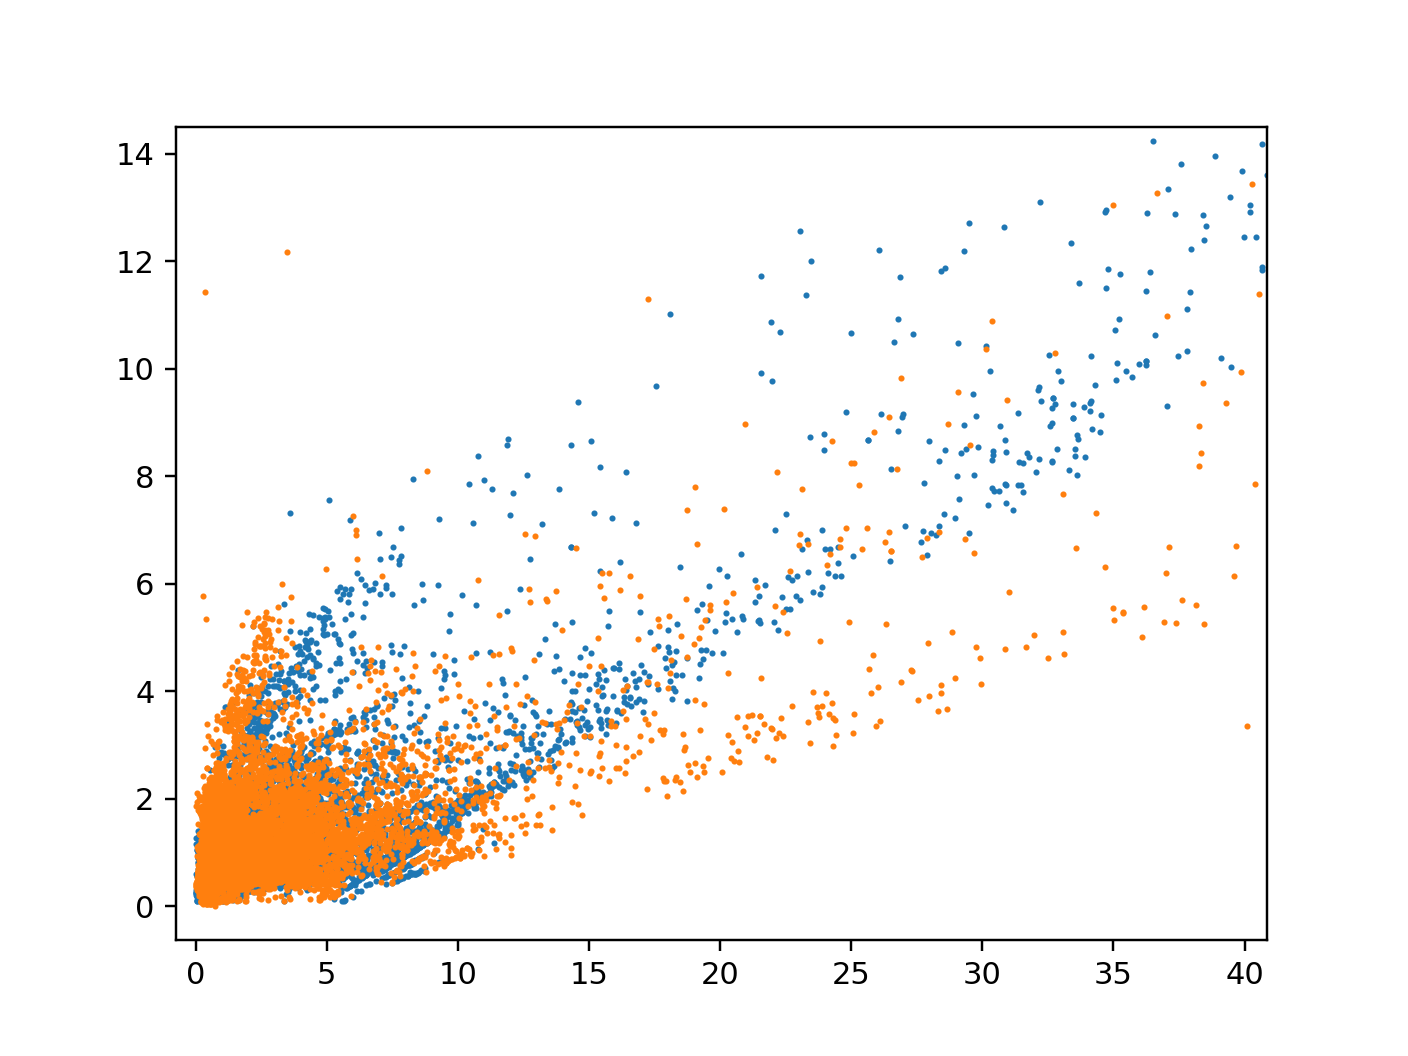

In [7]:
#eccentricity-size relationship
%matplotlib notebook
pl.figure()

pl.scatter(np.sqrt(gauss[rsq_map,0]**2+gauss[rsq_map,1]**2), gauss[rsq_map,2], s=1)
#pl.scatter(np.sqrt(css_res[rsq_map,0]**2+css_res[rsq_map,1]**2), css_res[rsq_map,2], s=1)
pl.scatter(np.sqrt(norm_unbound[rsq_map,0]**2+norm_unbound[rsq_map,1]**2), norm_unbound[rsq_map,2], s=1)

In [ ]:
#further parameter relationships



In [ ]:
######################################################################################

In [ ]:
#the following cells are in case we want to quickly look at some specific model/data timecourse

In [ ]:
#create stim
dm_list = []
for screenshot_path in screenshot_paths:
    # create stimulus
    dm_list.append(create_dm_from_screenshots(screenshot_path,
                                              n_pix)[..., discard_volumes:])

task_lengths = [dm.shape[-1] for dm in dm_list]
dm_full = np.concatenate(tuple(dm_list), axis=-1)

prf_stim = PRFStimulus2D(screen_size_cm=39.3,
                         screen_distance_cm=210,
                         design_matrix=dm_full,
                         TR=1.5)

In [ ]:
%matplotlib notebook
vox_num=50370
fig=pl.figure()
window_length=121
hrf=[1,1,0]

#initialize models (gg does both regular gaussian and CSS)
gg = Iso2DGaussianGridder(stimulus=prf_stim,
                          hrf=hrf,
                          filter_predictions=True,
                          window_length=window_length,
                          task_lengths=task_lengths)

gg_norm = Norm_Iso2DGaussianGridder(stimulus=prf_stim,
                                    hrf=hrf,
                                    filter_predictions=True,
                                    window_length=window_length,
                                    task_lengths=task_lengths)

gg_dog = DoG_Iso2DGaussianGridder(stimulus=prf_stim,
                                  hrf=hrf,
                                  filter_predictions=True,
                                  window_length=window_length,
                                  task_lengths=task_lengths)


#create timecourses
tc_vox=timecourse[vox_num]
norm_grid_tc=gg_norm.return_single_prediction(*list(norm_grid[vox_num,:-1]))
norm_iter_tc=gg_norm.return_single_prediction(*list(norm_num[vox_num,:-1]))
gauss_tc=gg.return_single_prediction(*list(gauss[vox_num,:-1]))

pl.plot(tc_vox)
pl.plot(norm_grid_tc)
pl.plot(norm_iter_tc)

print(1-np.sum((tc_vox-norm_grid_tc)**2)/(1180*np.var(tc_vox)))
print(1-np.sum((tc_vox-norm_iter_tc)**2)/(1180*np.var(tc_vox)))
print(1-np.sum((tc_vox-gauss_tc)**2)/(1180*np.var(tc_vox)))

print(norm_grid[vox_num])
print(norm_num[vox_num])